In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import svm

import warnings
warnings.filterwarnings("ignore")

In [125]:
data_directory = "data"
heart_attack_data = pd.read_csv(os.path.join(data_directory, "heart.csv"))

In [126]:
print("The shape of the dataset is : ", heart_attack_data.shape)

The shape of the dataset is :  (303, 14)


In [127]:
dict = {}
for i in list(heart_attack_data.columns):
    dict[i] = heart_attack_data[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [128]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall'] # categorical columns
con_cols = ["age","trtbps","chol","thalachh","oldpeak"] # continuous columns
target_col = ["output"]

In [129]:
heart_attack_data[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# Univariant Analysis

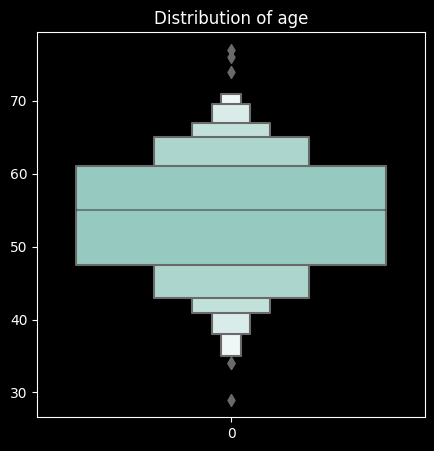

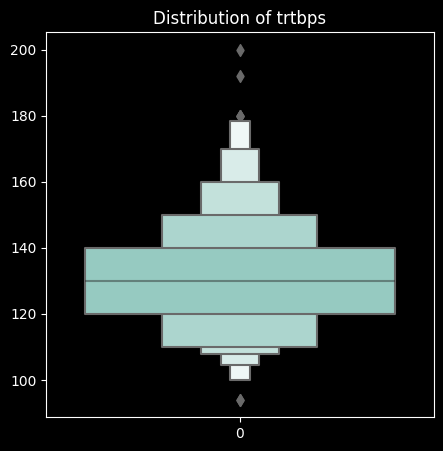

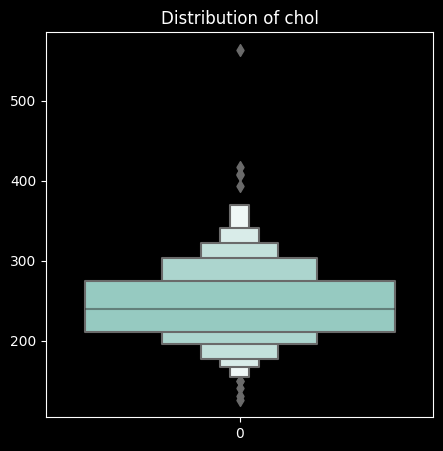

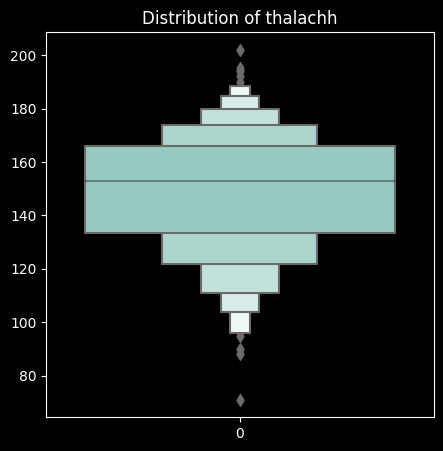

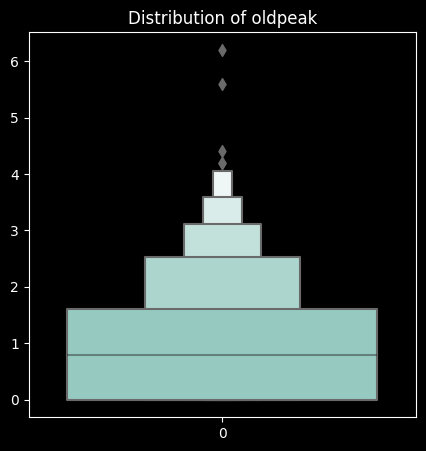

In [130]:
for heading in con_cols:
    plt.figure(figsize=(5,5))
    sns.boxenplot(heart_attack_data[heading])
    plt.title(f"Distribution of {heading}")

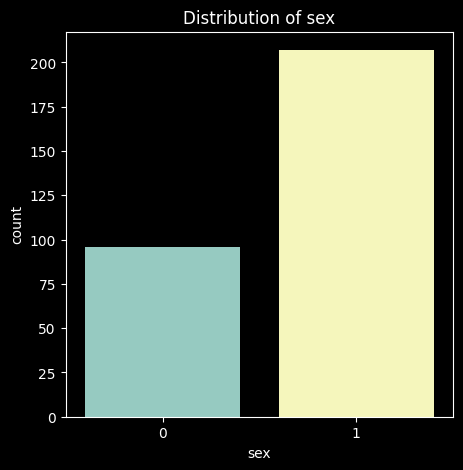

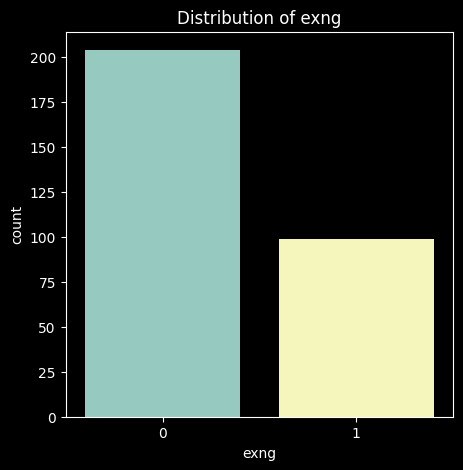

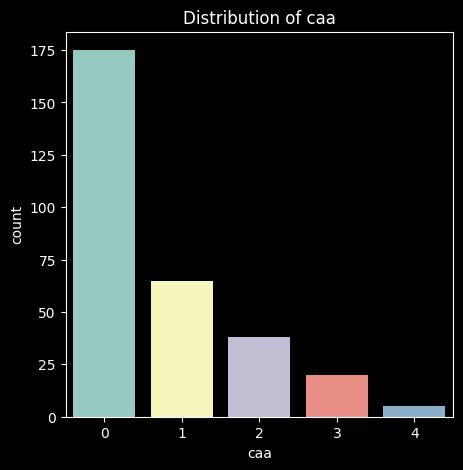

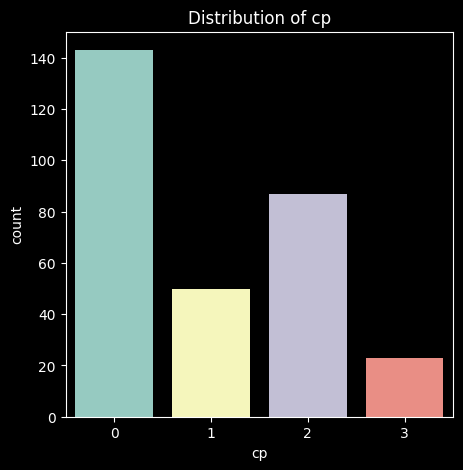

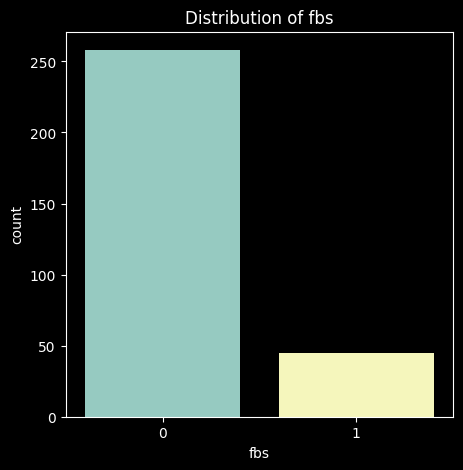

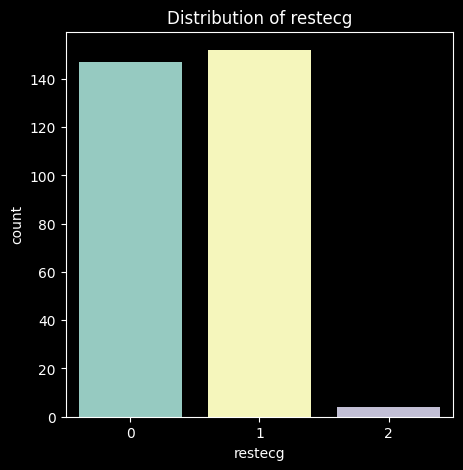

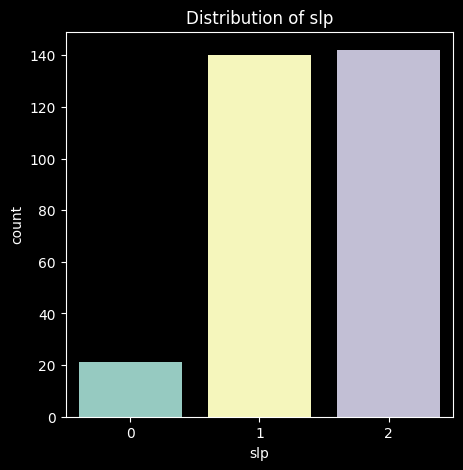

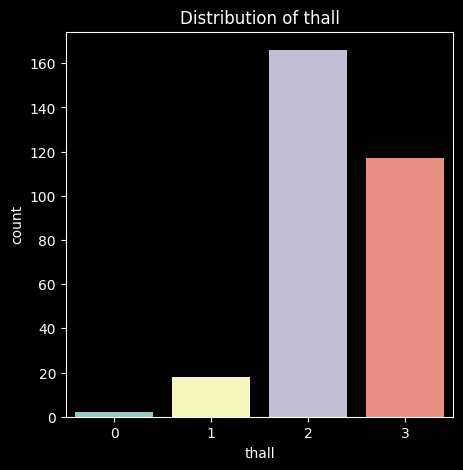

In [131]:
for heading in cat_cols:
    plt.figure(figsize=(5,5))
    sns.countplot(data=heart_attack_data,x=heading)
    plt.title(f"Distribution of {heading}")

# Models

In [132]:
# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

print('Packages imported...')

Packages imported...


In [133]:
# creating a copy of df
df1 = heart_attack_data

# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop(['output'],axis=1)
y = df1[['output']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])

In [134]:
# instantiating the object and fitting
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 61)
clf = svm.SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is  0.819672131147541


In [135]:
# instantiating the object
svm = SVC()

# setting a grid - not so extensive
parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}

# instantiating the GridSearchCV object
searcher = GridSearchCV(svm, parameters)

# fitting the object
searcher.fit(X_train, y_train)

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# predicting the values
y_pred = searcher.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred))

The best params are : {'C': 6, 'gamma': 0.05}
The best score is   : 0.8348639455782314
The test accuracy score of SVM after hyper-parameter tuning is  0.8688524590163934


In [136]:
# instantiating the object
logreg = LogisticRegression()

# fitting the object
logreg.fit(X_train, y_train)

# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))

The test accuracy score of Logistric Regression is  0.8524590163934426


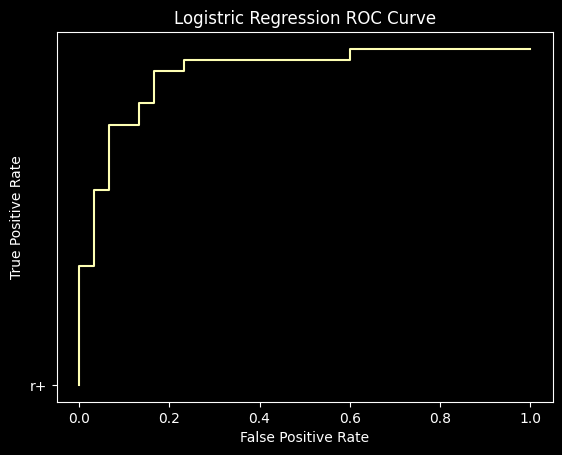

In [137]:
# calculating the probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()


In [138]:
# instantiating the object
dt = DecisionTreeClassifier(random_state = 42)

# fitting the model
dt.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is  0.7704918032786885


In [139]:
# instantiating the object
rf = RandomForestClassifier()

# fitting the model
rf.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is  0.7704918032786885


In [156]:
# instantiate the classifier
gbt = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42)

# fitting the model
gbt.fit(X_train,y_train)

# predicting values
y_pred = gbt.predict(X_test)

print("The test accuracy score of Gradient Boosting Classifier is ", accuracy_score(y_test, y_pred))

<class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'>
The test accuracy score of Gradient Boosting Classifier is  0.8688524590163934


In [171]:
params = {
    'objective': 'binary:logistic',  # Binary classification objective
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100
}

num_round = 900
data_matrix = xgb.DMatrix(X_train, label=y_train)
bst = xgb.train(params, data_matrix,num_round)

test_data_matrix = xgb.DMatrix(X_test, label=y_test)

# predicting values
y_pred = bst.predict(test_data_matrix)

# Convert probabilities to binary labels using a threshold
binary_predictions = [1 if pred >= 0.5 else 0 for pred in y_pred]

print("The test accuracy score of XGBoost Classifier is ", accuracy_score(y_test, binary_predictions))

[12:56:30] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

The test accuracy score of XGBoost Classifier is  0.7540983606557377
